# Mustererkennung/Machine Learning - Assignment 4 Solution

##### Questions to julian.stastny@fu-berlin.de

In [1]:
import numpy as np
import pandas as pd
from numpy.linalg import pinv, eigh
from matplotlib import pyplot as plt
import os

In [2]:
training_data = np.array(pd.read_csv('Data/zip.train', sep=' ', header=None))
test_data = np.array(pd.read_csv('Data/zip.test', sep =' ',header=None))

X_train, y_train = training_data[:,1:-1], training_data[:,0]
X_test, y_test = test_data[:,1:], test_data[:,0]

In [3]:
# The images come from the greyscale version of the LFW-Dataset

images = []
for filename in os.listdir("Data/faces"):
    images += [plt.imread("Data/faces/" + filename).flatten()]
images = np.array(images)

In [4]:
class PCA:
    
    def fit(self, X, k):
        cov_X = np.cov(X, rowvar=False)
        eig_values, eig_vectors = eigh(cov_X)
        return eig_vectors.T[-k:]
    
    def project(self, X, eig_vectors):
        return X@eig_vectors.T

In [15]:
class Visualizer:
    
    def __init__(self):
        self.model = PCA()
    
    def classes_2d(self, X, y):
        eig_vectors = self.model.fit(X, 2)
        projections = self.model.project(X, eig_vectors)
        # works only if there are 10 classes
        num_classes = 10
        fig = plt.figure(figsize=(25, 50))
        pos = 0
        for i in range(num_classes):
            for j in range(i+1, num_classes):
                pos += 1
                ax = plt.subplot(9, 5, pos)
                
                self._plot_classes(projections, y, i, j)

                plt.axis('off')
                plt.title("%d vs %d" % (i, j))
        plt.show()
        
    def eigenfaces(self, X, k=20):
        eig_vectors = self.model.fit(X, k)
        eig_vectors *= 4
        images = eig_vectors.reshape(k, 64, 64)
        fig = plt.figure(figsize=(50, 40))
        for i in range(0, k):
            ax = plt.subplot(4, 5, i+1)
            plt.imshow(images[i])
            plt.title(str(i+1))
        plt.show()
        
    def _plot_classes(self, projections, y, i, j):
        filtered_by_i = projections[y==i]
        filtered_by_j = projections[y==j]
        plt.scatter(filtered_by_i[:,0], filtered_by_i[:,1])
        plt.scatter(filtered_by_j[:,0], filtered_by_j[:,1])

## Accuracy of Classification after reducing to two dimensions

In [6]:
from LinearRegression import OneVsOne, LeastSquares

In [7]:
pca = PCA()
eig_vectors = pca.fit(X_train, 2)

In [8]:
X_train_2d = pca.project(X_train, eig_vectors)
X_test_2d = pca.project(X_test, eig_vectors)

X_train_2d = np.concatenate((np.ones((len(X_train_2d),1)), X_train_2d), axis=1)
X_test_2d = np.concatenate((np.ones((len(X_test_2d),1)), X_test_2d), axis=1)

In [9]:
linear_regression = OneVsOne(LeastSquares)
linear_regression.fit(X_train_2d, y_train)

In [10]:
predictions = linear_regression.predict(X_test_2d)
print(linear_regression.accuracy(y_test, predictions))
print(linear_regression.confusion_matrix(y_test, predictions))

0.5196811160936722
[[294.   0.  11.  18.   1.   8.  26.   0.   1.   0.]
 [  0. 260.   0.   2.   1.   0.   1.   0.   0.   0.]
 [ 18.   8.  72.  47.  16.   6.  27.   0.   4.   0.]
 [ 23.   0.  34.  72.  21.   9.   1.   0.   5.   1.]
 [  1.  16.  11.  22.  60.   4.   7.  30.   4.  45.]
 [ 43.   0.  28.  34.   9.  11.  34.   0.   1.   0.]
 [ 17.  11.  14.   2.   1.   7. 118.   0.   0.   0.]
 [  0.   3.   3.   4.  10.   0.   0.  95.   0.  32.]
 [  8.   6.  30.  47.  58.   2.   1.   3.   6.   5.]
 [  0.  11.   0.   8.  21.   0.   0.  81.   1.  55.]]


## Visualizing the overlap between classes

In [16]:
visualizer = Visualizer()

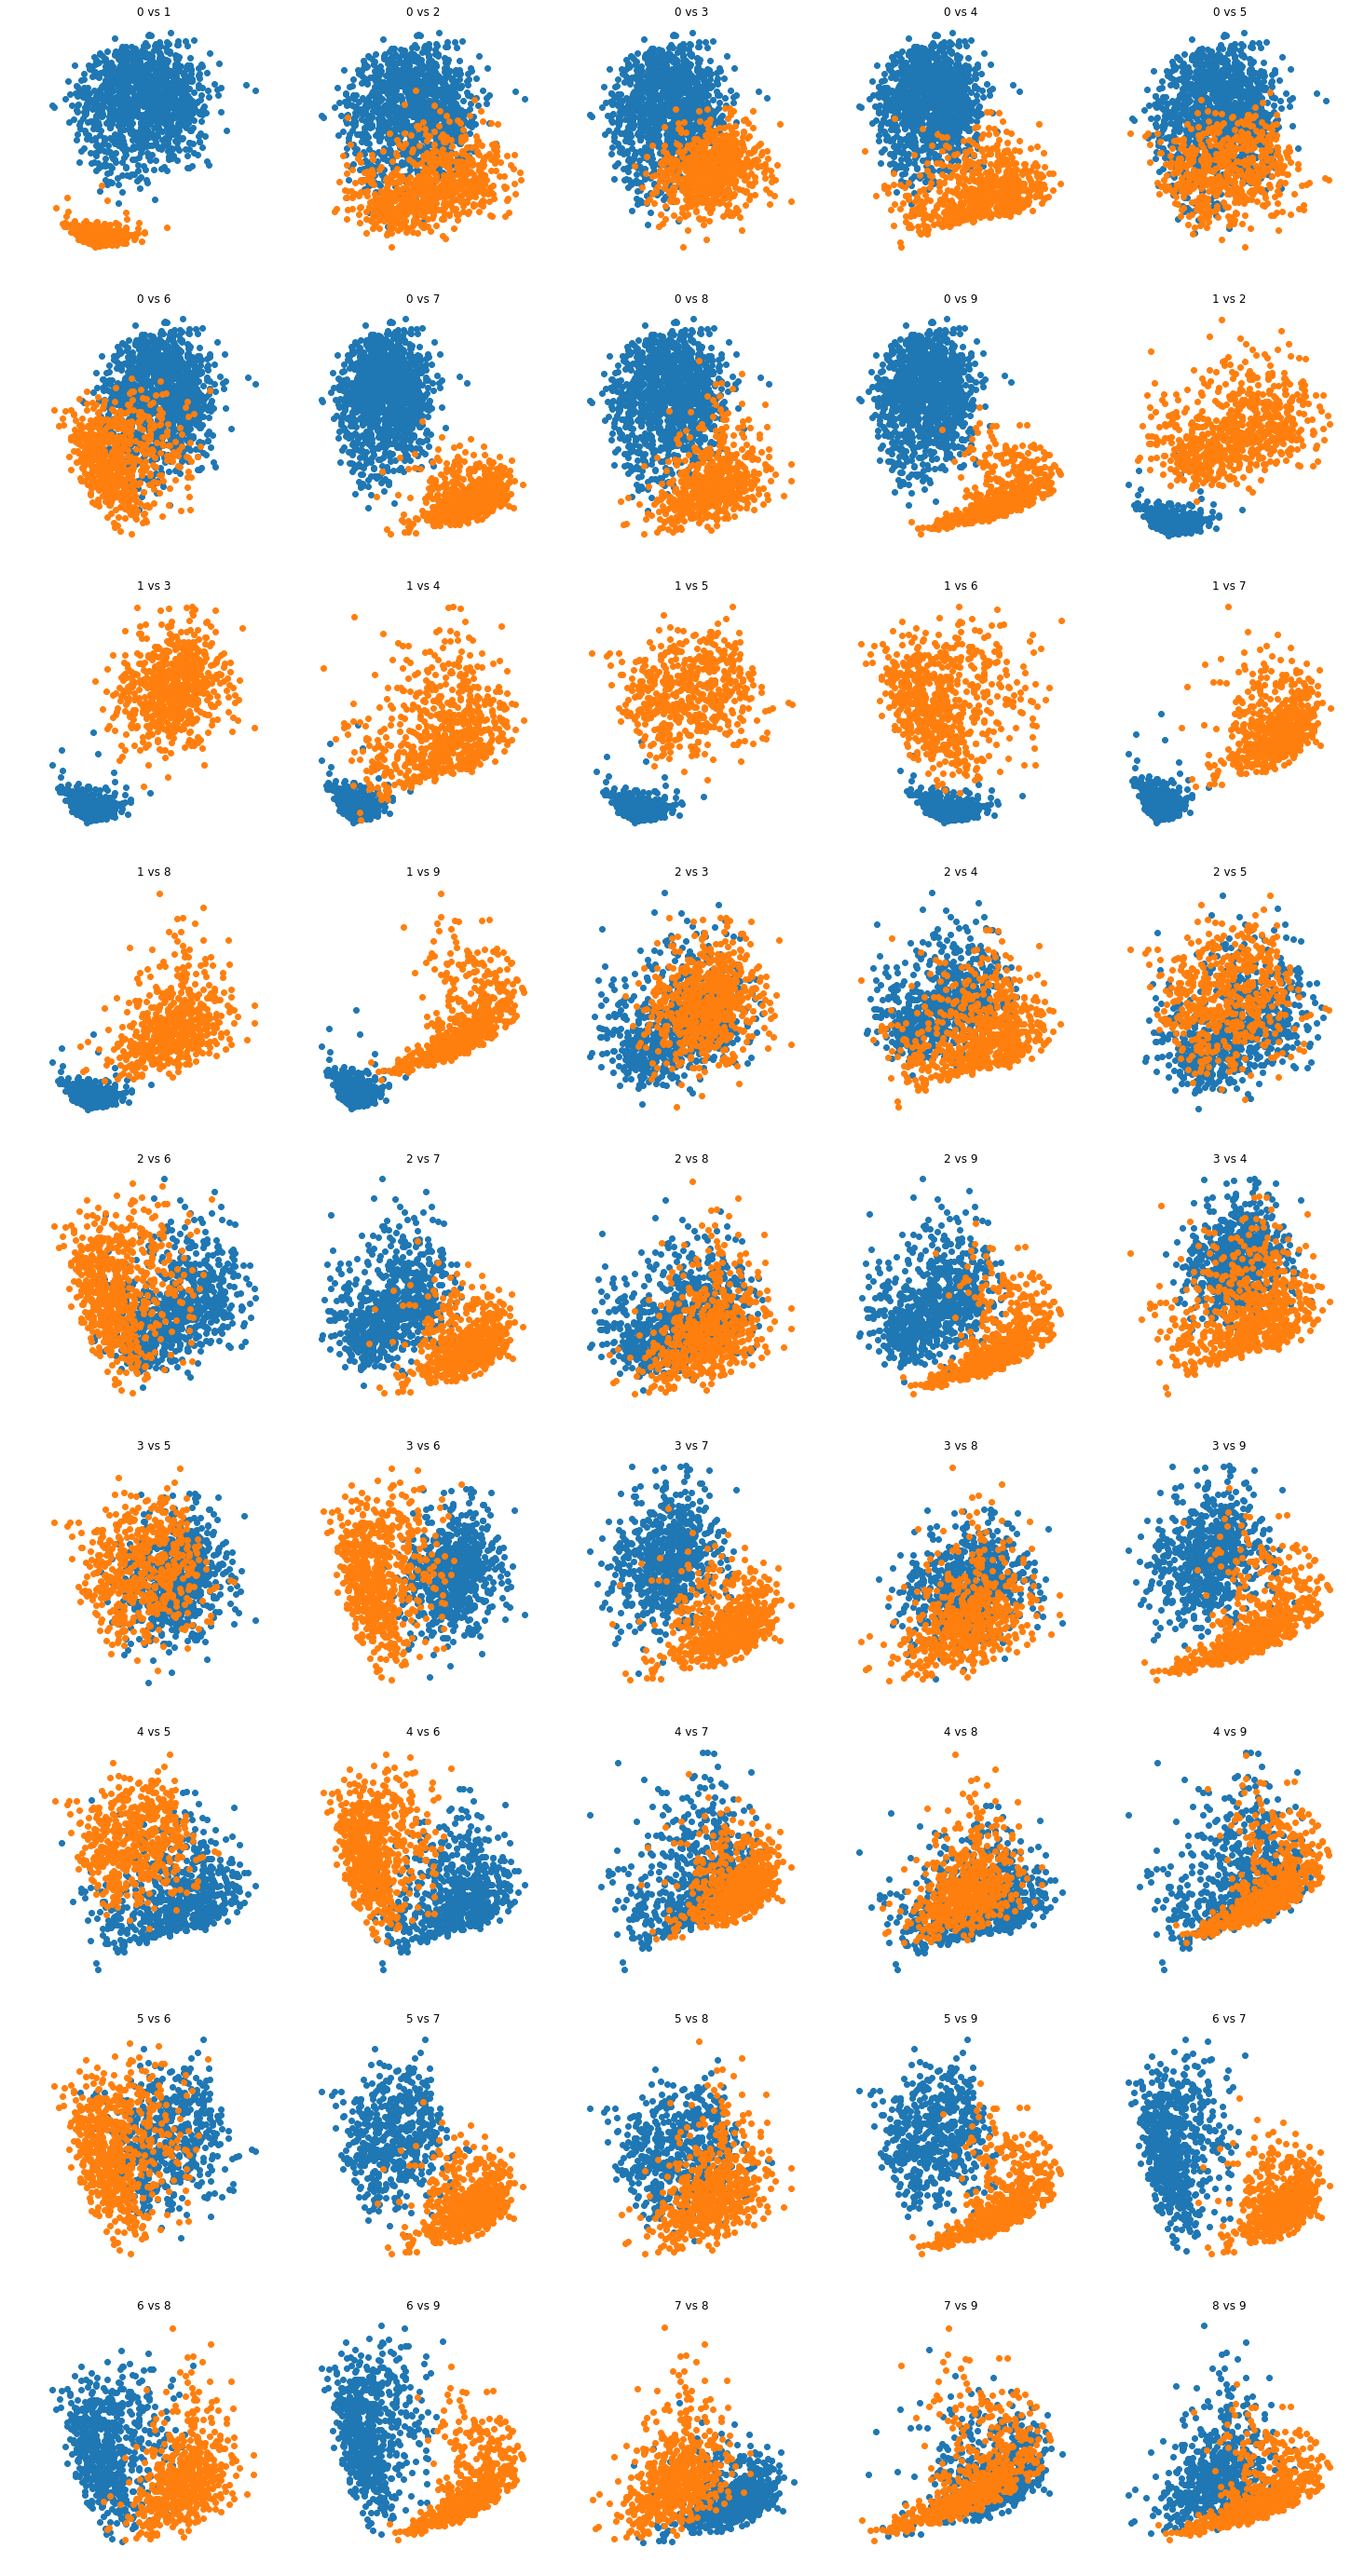

In [12]:
visualizer.classes_2d(X_train, y_train)

## Eigenfaces are creepy

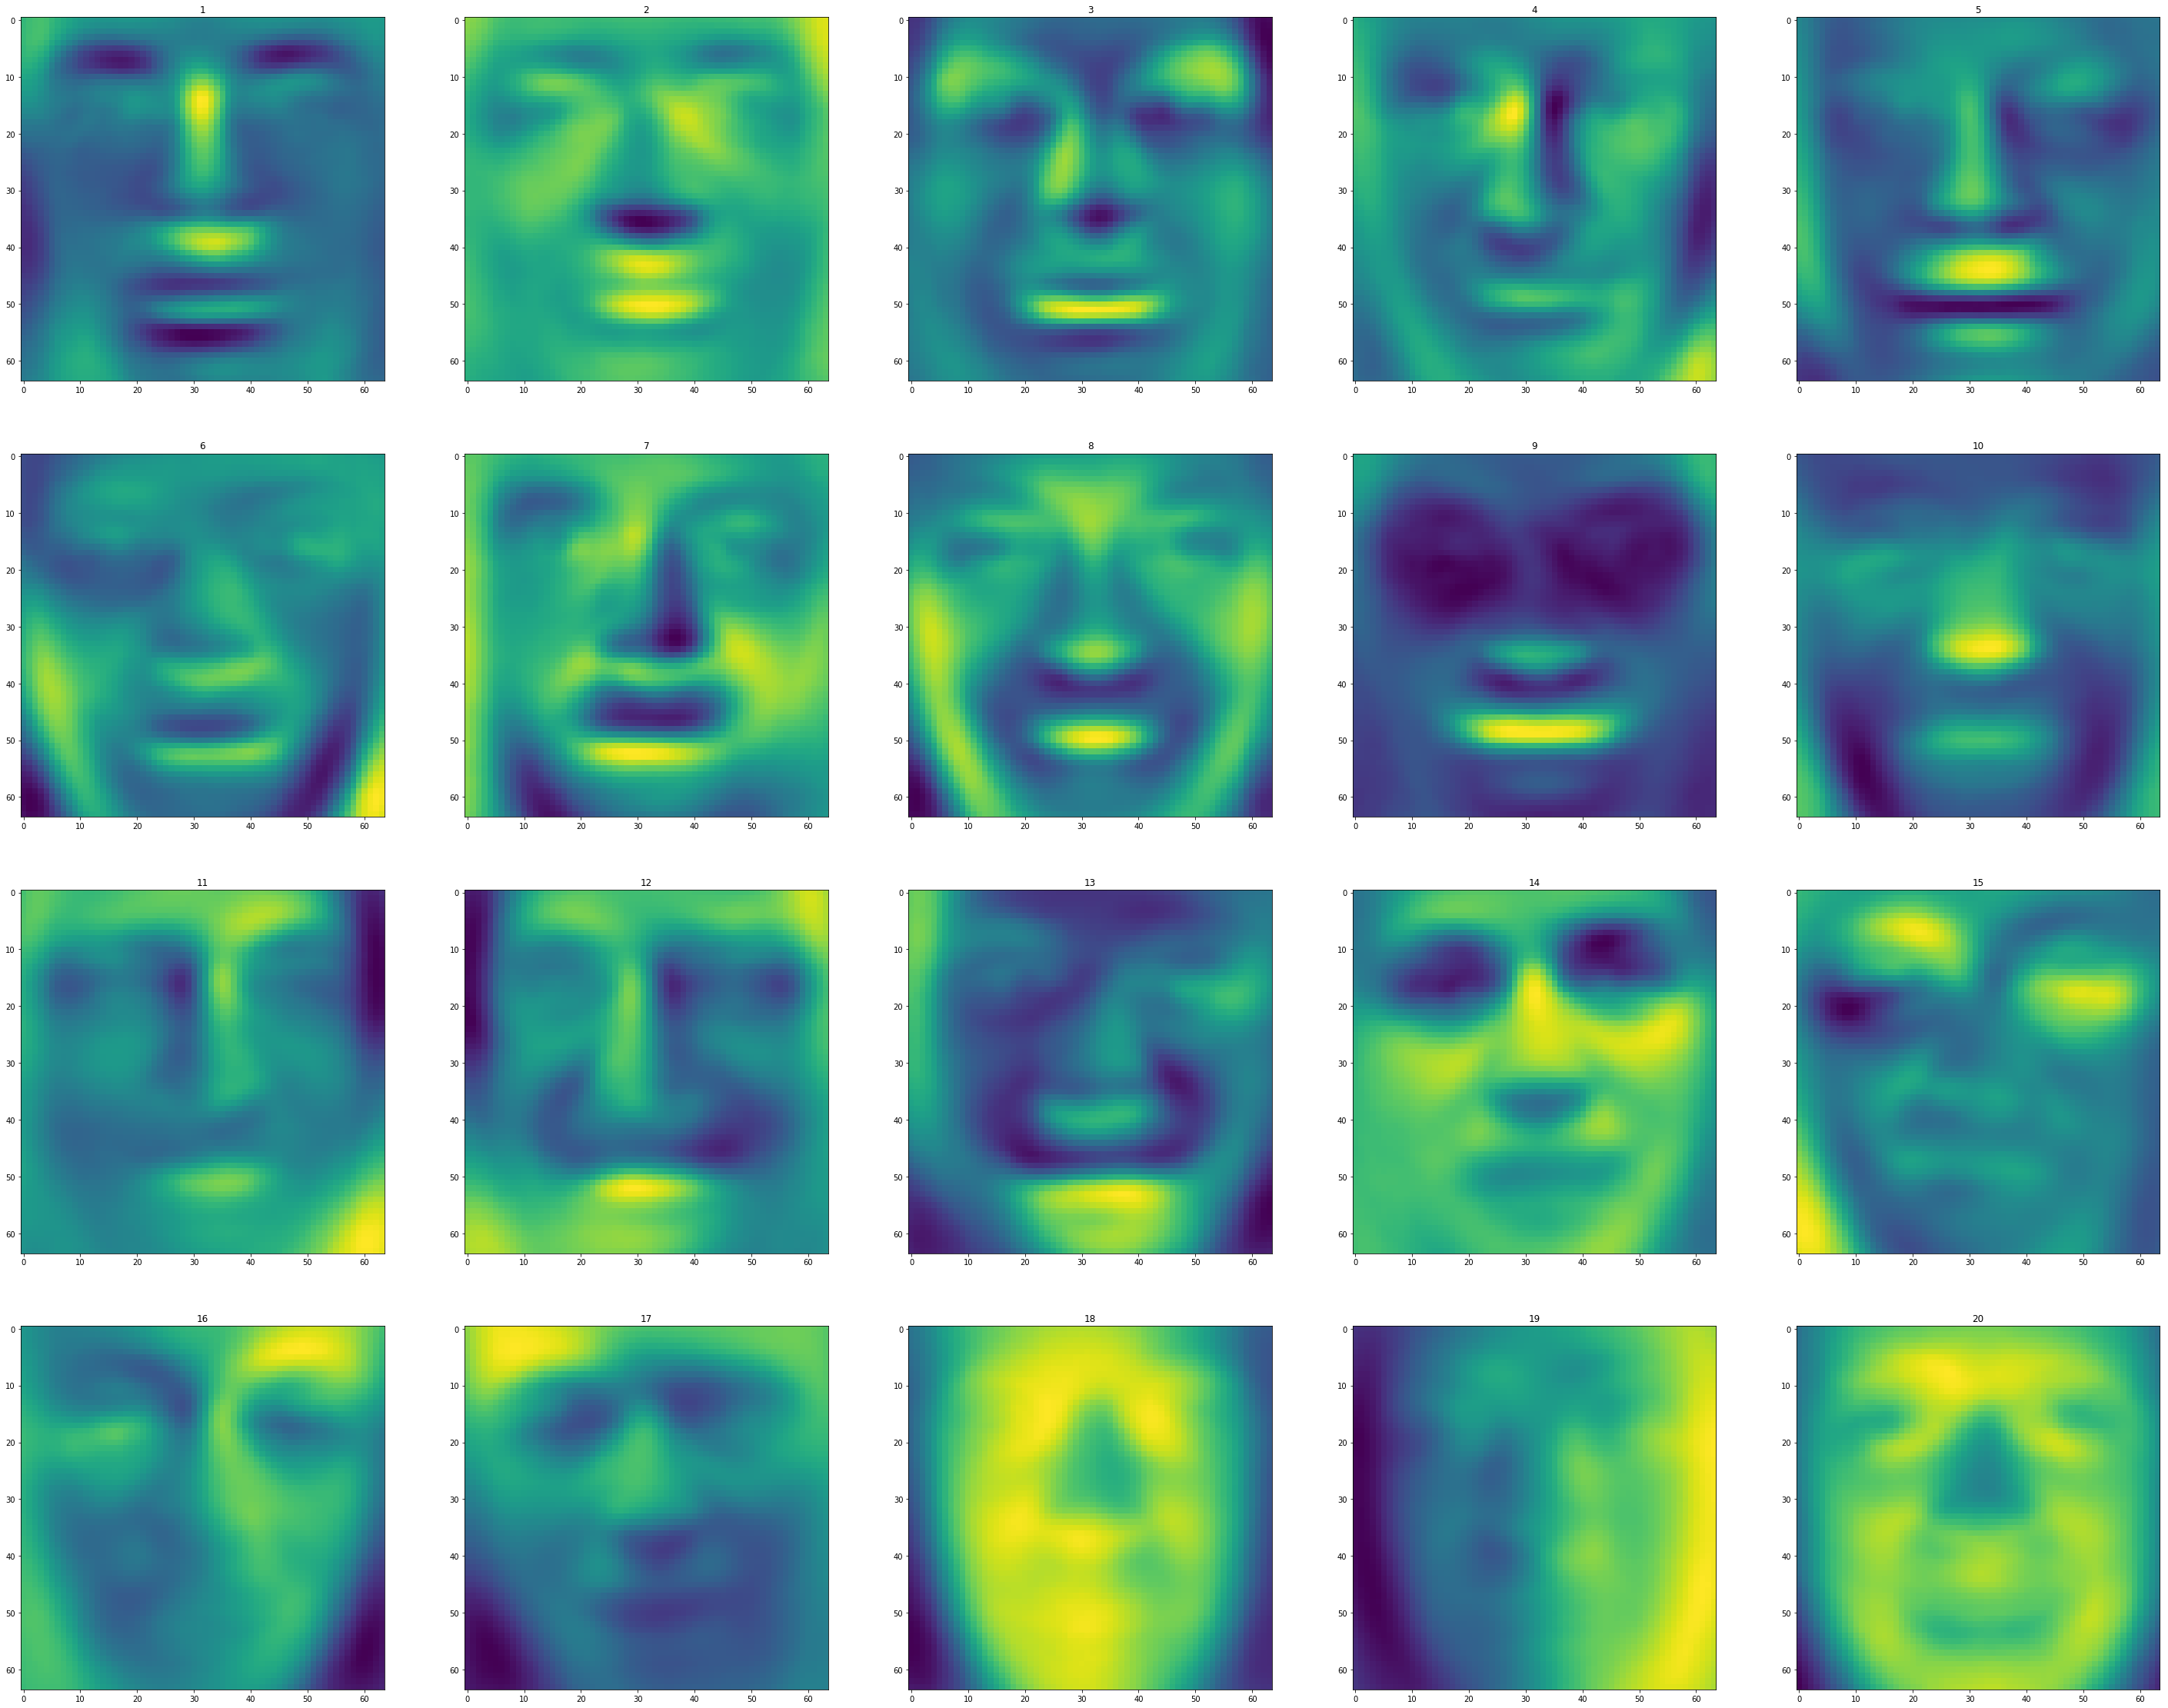

In [17]:
visualizer.eigenfaces(images)